In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os import listdir, makedirs
import matplotlib.pyplot as plt
from keras import layers, models, optimizers, regularizers, losses
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.datasets import mnist
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')
print(os.listdir("/home/yaagocruuz/Documentos/git/Topicos3/Trabalho Final/"))

/home/yaagocruuz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['retrain.py', '.ipynb_checkpoints', 'sem_finetuning.ipynb', 'dataset', 'Trabalho Final.ipynb']


In [12]:
RESOLUTION = 139
BATCH_SIZE = 16


data_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,
                                  horizontal_flip=True, validation_split=0.20)

train_generator = data_datagen.flow_from_directory(
        "dataset/",
        classes=['Caroline_Kennedy', 'Edward_Moore_Kennedy', 'Eunice_Kennedy_Shriver', 'Jacqueline_Lee_Bouvier', 
                 'Jean_Kennedy Smith', 'John_F_Kennedy_Jr', 'John_Fitzgerald_Kennedy', 
                 'Joseph_P_Kennedy_Sr', 'Robert_Francis_Kennedy', 'Rose_Elizabeth_Fitzgerald', 
                 'Rosemary_Kenndy', 'Outros'],
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_generator = data_datagen.flow_from_directory(
        "dataset/",
        classes=['Caroline_Kennedy', 'Edward_Moore_Kennedy', 'Eunice_Kennedy_Shriver', 'Jacqueline_Lee_Bouvier', 
                 'Jean_Kennedy Smith', 'John_F_Kennedy_Jr', 'John_Fitzgerald_Kennedy', 
                 'Joseph_P_Kennedy_Sr', 'Robert_Francis_Kennedy', 'Rose_Elizabeth_Fitzgerald', 
                 'Rosemary_Kenndy', 'Outros'],
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 281 images belonging to 12 classes.
Found 66 images belonging to 12 classes.


In [3]:
train_generator.class_indices

{'Caroline_Kennedy': 0,
 'Edward_Moore_Kennedy': 1,
 'Eunice_Kennedy_Shriver': 2,
 'Jacqueline_Lee_Bouvier': 3,
 'Jean_Kennedy Smith': 4,
 'John_F_Kennedy_Jr': 5,
 'John_Fitzgerald_Kennedy': 6,
 'Joseph_P_Kennedy_Sr': 7,
 'Robert_Francis_Kennedy': 8,
 'Rose_Elizabeth_Fitzgerald': 9,
 'Rosemary_Kenndy': 10,
 'Outros': 11}

In [4]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))

In [9]:
def inceptionV3_pretrained_model(model_inceptionV3):
  
    model = Sequential()
    model.add(model_inceptionV3)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

    return model

In [10]:
final = inceptionV3_pretrained_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_4 (Dense)              (None, 12)                3084      
Total params: 26,524,716
Trainable params: 26,490,284
Non-trainable params: 34,432
_________________________________________________________________


In [11]:
N_TRAIN = 281
N_VAL = 66

history = final.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // BATCH_SIZE),
        epochs=20,
        validation_data=val_generator,
        validation_steps=(66 // BATCH_SIZE) 
    )

Epoch 1/20
17/17 [==============================] - 94s 6s/step - loss: 2.3357 - acc: 0.2474 - val_loss: 2.3590 - val_acc: 0.2879
Epoch 2/20
17/17 [==============================] - 75s 4s/step - loss: 1.9827 - acc: 0.3750 - val_loss: 2.1044 - val_acc: 0.3939
Epoch 3/20
17/17 [==============================] - 93s 5s/step - loss: 1.8177 - acc: 0.3859 - val_loss: 2.0481 - val_acc: 0.3485
Epoch 4/20
17/17 [==============================] - 67s 4s/step - loss: 1.7874 - acc: 0.3947 - val_loss: 1.8923 - val_acc: 0.4091
Epoch 5/20
17/17 [==============================] - 64s 4s/step - loss: 1.5821 - acc: 0.4718 - val_loss: 1.8786 - val_acc: 0.4545
Epoch 6/20
17/17 [==============================] - 65s 4s/step - loss: 1.5490 - acc: 0.4743 - val_loss: 1.8314 - val_acc: 0.5000
Epoch 7/20
17/17 [==============================] - 63s 4s/step - loss: 1.4825 - acc: 0.5406 - val_loss: 1.7734 - val_acc: 0.5152
Epoch 8/20
17/17 [==============================] - 65s 4s/step - loss: 1.3528 - acc: 0.56

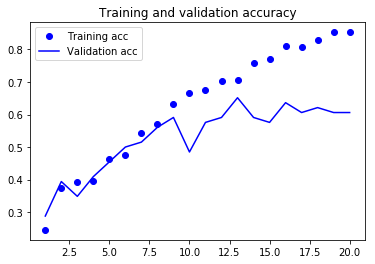

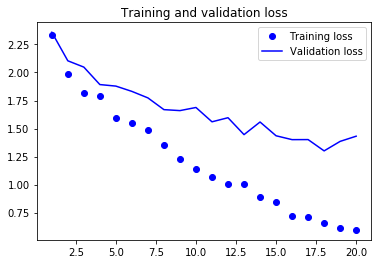

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()